## Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

[Mutual Information, Wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Using Scikit-learn, we can determine the mutual information between a variable and the target using the mutual_info_classif or mutual_info_regression for binary or continuous targets.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Classification

In [2]:
# load dataset

data = pd.read_csv('../Data/dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Determine Mutual Information

In [5]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.61524544e-03, 0.00000000e+00, 1.12123022e-03,
       2.97993064e-04, 5.09642098e-03, 4.80163565e-03, 3.11265051e-03,
       0.00000000e+00, 3.37078202e-04, 7.82459340e-04, 9.00116952e-04,
       9.22879212e-04, 4.86686890e-03, 0.00000000e+00, 1.68665959e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.53027784e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.61661228e-03, 1.50573185e-03, 0.00000000e+00, 0.00000000e+00,
       4.85753829e-03, 1.71003724e-02, 0.00000000e+00, 2.09104389e-03,
       3.38623640e-05, 1.85928115e-03, 4.66574609e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.31555817e-04, 3.30695095e-03,
       1.32993015e-03, 1.96793598e-03, 0.00000000e+00, 3.68069659e-03,
       0.00000000e+00, 3.89167127e-04, 0.00000000e+00, 2.84760699e-03,
       0.00000000e+00, 3.33982909e-03, 4.07175157e-02, 1.61273793e-03,
      

/var/folders/pc/t6w9tgr112v1xdsjl9vggh6c0000gn/T/ipykernel_66146/3154869192.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


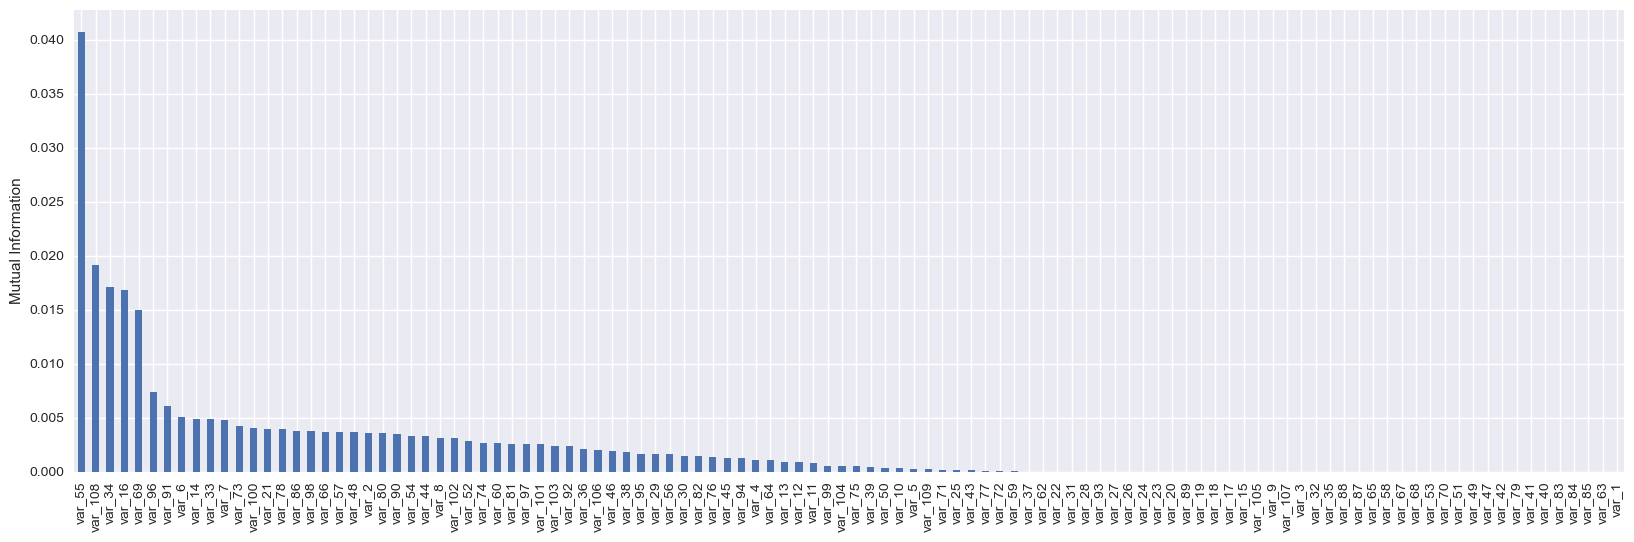

In [6]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

plt.style.use('seaborn')
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information');

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including the MI.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the MI.

Alternatively, if we want to select features based on a MI threshold, we can do it manually.

### Select top k features based on MI

In [7]:
# omd

X_train[mi.sort_values(ascending=False).head(10).index]

,var_55,var_108,var_34,var_16,var_69,var_96,var_91,var_6,var_14,var_33
17967,0.727607,1.312909,10.722357,0.00,1.00,5.736979,0.0,7.996028e-01,12.736036,8.756218
32391,3.938067,5.125165,13.502809,0.91,0.00,7.373931,0.0,1.732501e+00,8.593242,5.541666
9341,1.137583,1.008314,11.510707,0.00,0.92,6.579564,0.0,7.831195e-01,12.086865,5.403669
7929,3.219455,4.610503,14.109724,1.00,0.00,8.276092,0.0,1.592075e+00,13.409115,5.979812
46544,0.027041,1.239388,11.503289,0.00,0.99,6.324151,0.0,1.487820e+00,14.021722,6.223308
...,...,...,...,...,...,...,...,...,...,...
21243,1.244458,6.346390,13.927165,1.98,0.00,8.091729,0.0,2.200036e-07,13.051242,9.300000
45891,1.533269,0.966302,11.176716,0.00,0.97,7.586337,0.0,3.358490e+00,6.320681,6.314150
42613,1.048125,1.006565,11.403659,0.00,0.99,6.664602,0.0,6.159737e-01,14.813767,7.525973
43567,0.991051,3.877680,14.270321,0.98,0.00,8.174883,0.0,2.834286e+00,9.326811,9.264069


In [8]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_33', 'var_34', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [9]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

## Regression

In [10]:
# load dataset
data = pd.read_csv('../Data/houseprice.csv')
data.shape

(1460, 81)

In [11]:
# omd
# vars_numerical = [var for var in data.columns if data[var].dtype != 'O']
vars_numerical = [var for var in data.select_dtypes(exclude='O').columns]
len(vars_numerical)

38

In [12]:
# omd 

# Extract metadata (column names and data types) to a new DataFrame
metadata_df = pd.DataFrame(data.dtypes, columns=['dtype'])

# Add additional information
metadata_df['total'] = data.shape[0                                  ]
metadata_df['missing_cnt'] = data.isna().sum()
metadata_df['missing_pct'] = data.isna().mean()

# Display the metadata DataFrame
display(metadata_df.head(10))
print(metadata_df.groupby('dtype')['dtype'].count())

,dtype,total,missing_cnt,missing_pct
Id,int64,1460,0,0.000000
MSSubClass,int64,1460,0,0.000000
MSZoning,object,1460,0,0.000000
LotFrontage,float64,1460,259,0.177397
LotArea,int64,1460,0,0.000000
Street,object,1460,0,0.000000
Alley,object,1460,1369,0.937671
LotShape,object,1460,0,0.000000
LandContour,object,1460,0,0.000000
Utilities,object,1460,0,0.000000


dtype
int64      35
float64     3
object     43
Name: dtype, dtype: int64


In [13]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [15]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Determine Mutual Information

Text(0, 0.5, 'Mutual Information')

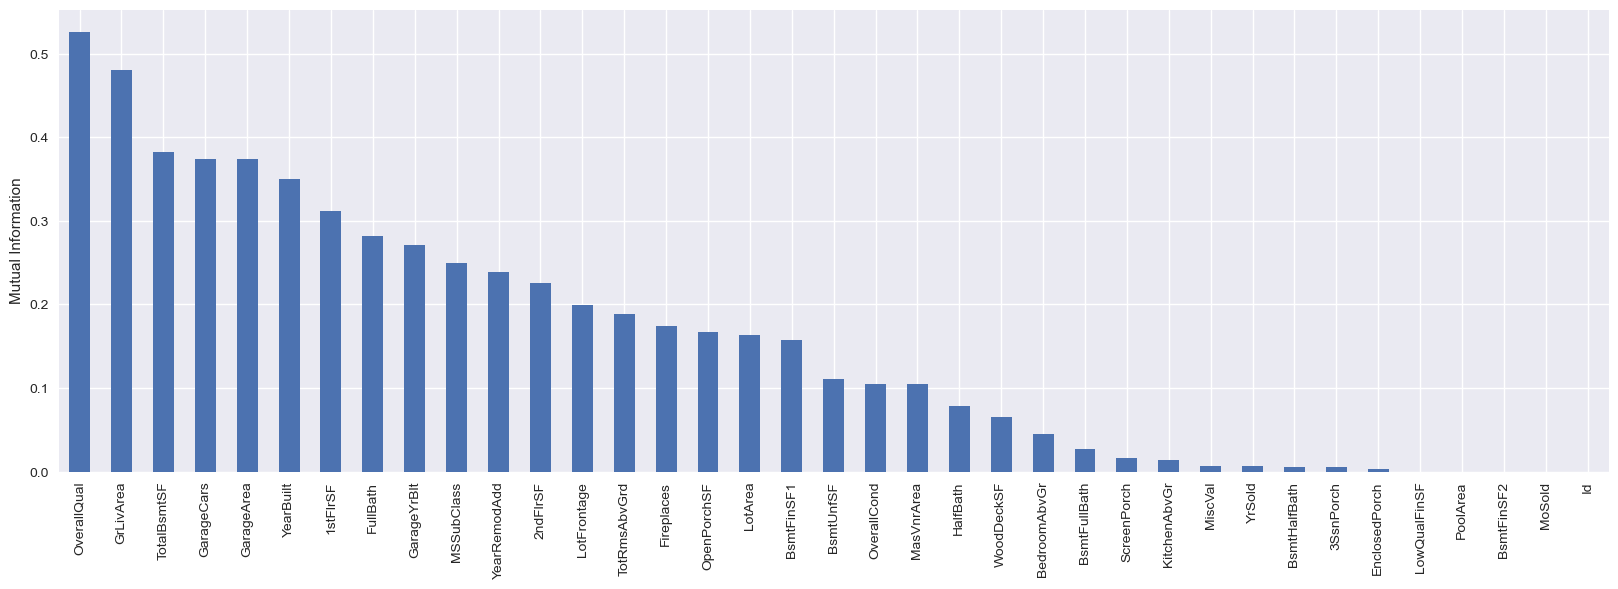

In [16]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

### Select top 10th percentile features

In [17]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')

In [18]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[   7., 1057., 2034.,  645.],
       [   6., 1291., 1291.,  431.],
       [   5.,  858.,  858.,    0.],
       ...,
       [   6.,    0., 1902.,  539.],
       [   7., 1374., 1557.,  420.],
       [   7., 1195., 1839.,  486.]])

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

That is all for this lecture, I hope you enjoyed it and see you in the next one!